In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings (action='ignore')

In [470]:
df=pd.read_excel('SR.xlsx',sheet_name='Data')

In [471]:
df.head()

,Name,Raised On
0,Access for ACFJUMPAZVM05 jumpbox,2020-07-01 19:06:09
1,<Internal Ticket> Finalizing ODC configuration...,2020-07-03 13:08:51
2,<Internal Ticket> ODC Ports requirements to Sh...,2020-07-03 13:09:37
3,Stale data fix for multiple dashboards and rep...,2020-07-04 21:15:14
4,extension,2020-07-06 13:08:36


In [472]:
df.drop('Raised On',axis=1,inplace=True)

In [473]:
df1=df.copy()

In [474]:
df1.head()

,Name
0,Access for ACFJUMPAZVM05 jumpbox
1,<Internal Ticket> Finalizing ODC configuration...
2,<Internal Ticket> ODC Ports requirements to Sh...
3,Stale data fix for multiple dashboards and rep...
4,extension


In [475]:
import nltk
#counting stop words from each line of status 
from nltk.corpus import stopwords
stop=stopwords.words ("english")

In [476]:
#printing stopword count 
df1["stopwords"]= df1["Name"].apply (lambda x: len ([x for x in x.split() if x in stop]))
#counting and printing how many words are present in status
df1 ["Word_count"]= df1 ["Name"].apply (lambda x: len (str(x).split()))

In [477]:
df1.head(10)

,Name,stopwords,Word_count
0,Access for ACFJUMPAZVM05 jumpbox,1,4
1,<Internal Ticket> Finalizing ODC configuration...,1,7
2,<Internal Ticket> ODC Ports requirements to Sh...,3,13
3,Stale data fix for multiple dashboards and rep...,2,8
4,extension,0,1
5,Request to provision VMs in [[ ES-CUS-SP7-DEV-...,2,9
6,Remove Grammarly | desktop-pcg6u8o,0,4
7,Request to create two new VM's for CCBA Projec...,3,12
8,AZSK: RE: Continuous Assurance | Shared Key an...,1,9
9,Granting 'Contributor' role to external guest ...,1,7


In [478]:
#removing the stop words
df1 ["Name"]= df1 ["Name"].apply (lambda x: " ".join (x for x in x.split() if x not in stop ))

In [479]:
df1.head(10)

,Name,stopwords,Word_count
0,Access ACFJUMPAZVM05 jumpbox,1,4
1,<Internal Ticket> Finalizing ODC configuration...,1,7
2,<Internal Ticket> ODC Ports requirements Share...,3,13
3,Stale data fix multiple dashboards reports,2,8
4,extension,0,1
5,Request provision VMs [[ ES-CUS-SP7-DEV-NCB_DE...,2,9
6,Remove Grammarly | desktop-pcg6u8o,0,4
7,Request create two new VM's CCBA Project facto...,3,12
8,AZSK: RE: Continuous Assurance | Shared Key ID,1,9
9,Granting 'Contributor' role external guest acc...,1,7


In [480]:
#Lets Drop the appended clumns as well
df1.drop(['stopwords','Word_count'],axis=1,inplace=True)

In [481]:
df1.tail(10)

,Name
244,Please create VM ExpressRoute network
245,Access change subscription
246,Need dynamics environment Galicia project
247,Cost Optimization OCT 2020-default Action tracker
248,"Please update Windows , Excel Edge Versions VM"
249,Access shared path
250,Provance tool access Operation Team DL AzureIn...
251,Create New VM
252,Multiple users cannot able connect VDI Parallely
253,Login issue Internal Azure Virtual Machines


In [482]:
#converting to LowerCase
df1["Name"]=df1["Name"].apply (lambda x: " ".join (x.lower() for x in x.split ()))

In [483]:
df1.tail(10)

,Name
244,please create vm expressroute network
245,access change subscription
246,need dynamics environment galicia project
247,cost optimization oct 2020-default action tracker
248,"please update windows , excel edge versions vm"
249,access shared path
250,provance tool access operation team dl azurein...
251,create new vm
252,multiple users cannot able connect vdi parallely
253,login issue internal azure virtual machines


In [484]:
#Punctuation Removal
#The / Is the beginning of a regex (regular expression). The \w looks for all word characters in a string. A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character. Now the \S is any character that is NOT a whitespace character. You were confusing it with \s(lowercase) which is for whitespace characters. The * is a character that says to look for n zero or more times, where n is the metacharacter(the backslash tokens in the regex) in the regex. Hope this helped a little.
df1["Name"]=df1["Name"].str.replace('[^\w\s]',' ').str.replace('_',' ')

In [485]:
df1.tail(10)

,Name
244,please create vm expressroute network
245,access change subscription
246,need dynamics environment galicia project
247,cost optimization oct 2020 default action tracker
248,please update windows excel edge versions vm
249,access shared path
250,provance tool access operation team dl azurein...
251,create new vm
252,multiple users cannot able connect vdi parallely
253,login issue internal azure virtual machines


In [486]:
from textblob import TextBlob
from textblob import Word
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()

In [487]:
df1["Name"]=df1["Name"].apply (lambda x: " ".join ([Word(word).lemmatize () for word in x.split()]))

In [488]:
df1.tail(10)

,Name
244,please create vm expressroute network
245,access change subscription
246,need dynamic environment galicia project
247,cost optimization oct 2020 default action tracker
248,please update window excel edge version vm
249,access shared path
250,provance tool access operation team dl azurein...
251,create new vm
252,multiple user cannot able connect vdi parallely
253,login issue internal azure virtual machine


## Bag of Words

In [489]:
#converting to bag of words/ document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=2)

In [490]:
df2=cv.fit_transform(df1["Name"]).toarray()

In [491]:
df2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [492]:
df3=pd.DataFrame(df2, columns=cv.get_feature_names())

In [493]:
df3.head()

,00,00am,00pm,02,02sep2020,03,03sep2020,04sep2020,05sep2020,06,06sep2020,07,07sep2020,08092020,08sep2020,09092020,09102020,09sep2020,10,10092020,11,11092020,11sep2020,12,12092020,12sep2020,13sep2020,14092020,14sep2020,15092020,16092020,16sep2020,17092020,17sep2020,18sep2020,2020,20am,30,30am,30pm,40,45,able,access,account,action,add,afternoon,alert,all,am,app,asa,august,automation,azsk,azure,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cu,data,dc,desktop,dev,devops,discussion,dl,enterprise,environment,existing,expressroute,external,factory,factoryazuresub,file,firewall,fix,gdinfra,health,id,install,int,integration,internal,ip,iso,issue,lab,laptop,lob,machine,microsoft,migration,modernization,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,odc,offshore,onprem,optimization,p2s,permission,please,pm,port,principal,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,right,role,run,server,service,setting,setup,sg,share,shared,shift,shutdown,si,sonar,space,sskc2,subscription,team,ticket,time,two,unable,unused,virtual,vm,vms,vnet,vpn,window,wsus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [494]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [495]:
df3[df3>0].count().sort_values(ascending=False)

firewall           121
monitoring         120
asa                113
shift              105
30                  93
pm                  91
10                  68
am                  51
morning             43
subscription        35
06                  28
night               27
02                  24
00                  23
30am                22
afternoon           21
access              20
required            19
azure               19
dev                 17
action              17
cost                17
optimization        15
vm                  15
service             14
11                  14
lab                 14
lob                 12
all                 11
server              10
30pm                10
check               10
reduce               9
need                 9
re                   9
role                 9
issue                8
00pm                 7
cu                   7
health               7
03sep2020            7
request              7
04sep2020            7
project    

In [496]:
df3.columns

Index(['00', '00am', '00pm', '02', '02sep2020', '03', '03sep2020', '04sep2020',
       '05sep2020', '06',
       ...
       'two', 'unable', 'unused', 'virtual', 'vm', 'vms', 'vnet', 'vpn',
       'window', 'wsus'],
      dtype='object', length=168)

In [497]:
df3.drop(['00', '00am', '00pm', '02', '02sep2020', '03', '03sep2020', '04sep2020','14sep2020','14092020','40','12','45',
       '05sep2020', '06','am','pm'],axis=1,inplace=True)

In [498]:
df3.head()

,06sep2020,07,07sep2020,08092020,08sep2020,09092020,09102020,09sep2020,10,10092020,11,11092020,11sep2020,12092020,12sep2020,13sep2020,15092020,16092020,16sep2020,17092020,17sep2020,18sep2020,2020,20am,30,30am,30pm,able,access,account,action,add,afternoon,alert,all,app,asa,august,automation,azsk,azure,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cu,data,dc,desktop,dev,devops,discussion,dl,enterprise,environment,existing,expressroute,external,factory,factoryazuresub,file,firewall,fix,gdinfra,health,id,install,int,integration,internal,ip,iso,issue,lab,laptop,lob,machine,microsoft,migration,modernization,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,odc,offshore,onprem,optimization,p2s,permission,please,port,principal,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,right,role,run,server,service,setting,setup,sg,share,shared,shift,shutdown,si,sonar,space,sskc2,subscription,team,ticket,time,two,unable,unused,virtual,vm,vms,vnet,vpn,window,wsus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [499]:
df3.columns

Index(['06sep2020', '07', '07sep2020', '08092020', '08sep2020', '09092020',
       '09102020', '09sep2020', '10', '10092020',
       ...
       'two', 'unable', 'unused', 'virtual', 'vm', 'vms', 'vnet', 'vpn',
       'window', 'wsus'],
      dtype='object', length=151)

In [501]:
df3.drop(['06sep2020', '07', '07sep2020', '08092020', '08sep2020', '09092020','12092020',
       '09102020', '09sep2020', '10', '10092020','11','11092020','11sep2020','12sep2020',
         '13sep2020','15092020','16092020','16sep2020','17092020','17sep2020','18sep2020','2020','20am',
          '30','30am','30pm'],axis=1,inplace=True)

In [502]:
df3.head()

,able,access,account,action,add,afternoon,alert,all,app,asa,august,automation,azsk,azure,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cu,data,dc,desktop,dev,devops,discussion,dl,enterprise,environment,existing,expressroute,external,factory,factoryazuresub,file,firewall,fix,gdinfra,health,id,install,int,integration,internal,ip,iso,issue,lab,laptop,lob,machine,microsoft,migration,modernization,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,odc,offshore,onprem,optimization,p2s,permission,please,port,principal,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,right,role,run,server,service,setting,setup,sg,share,shared,shift,shutdown,si,sonar,space,sskc2,subscription,team,ticket,time,two,unable,unused,virtual,vm,vms,vnet,vpn,window,wsus
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [503]:
df3[df3>0].count().sort_values(ascending=False)

firewall           121
monitoring         120
asa                113
shift              105
morning             43
subscription        35
night               27
afternoon           21
access              20
azure               19
required            19
action              17
dev                 17
cost                17
optimization        15
vm                  15
service             14
lab                 14
lob                 12
all                 11
check               10
server              10
role                 9
re                   9
reduce               9
need                 9
issue                8
request              7
health               7
cu                   7
create               6
project              6
new                  6
factory              6
int                  6
existing             6
unable               6
notification         5
prod                 5
id                   4
odc                  4
account              4
vms                  4
virtual    

In [152]:
!pip install wordcloud

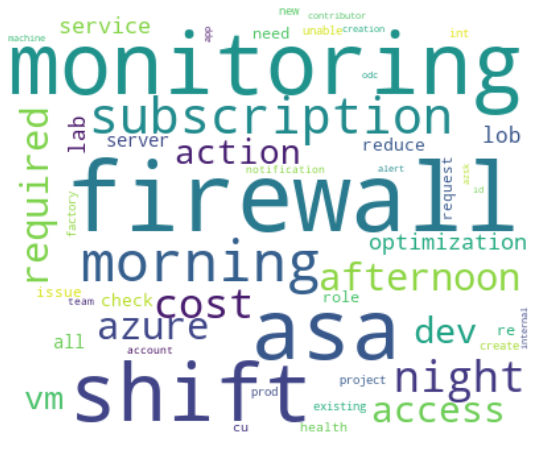

In [504]:
from wordcloud import WordCloud

#Generate word cloud based on Count 
wc = WordCloud(width=400, height=330, max_words=50, background_color='white').generate_from_frequencies(df3[:].sum())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Update :
By seeing below results, we can conclude that few words are contributing more for cluster making, being less importent. So lets drop those few words.

In [505]:
df3.drop(['shift','night','afternoon','noon','morning','august','all'],axis=1,inplace=True)

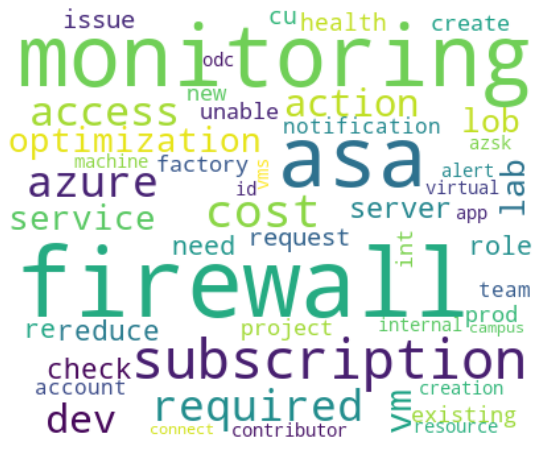

In [506]:
#Generate word cloud based on Count 
wc = WordCloud(width=400, height=330, max_words=50, background_color='white').generate_from_frequencies(df3[:].sum())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## K Means Clustering 

In [154]:
from sklearn.cluster import KMeans

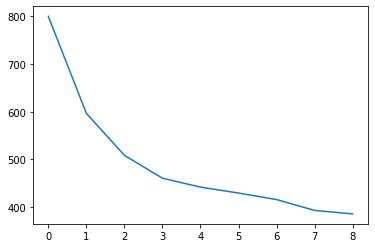

In [507]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, random_state=10,max_iter=100)
    model_clus.fit(df3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [508]:
n_clusters = 6
clf = KMeans(n_clusters=n_clusters, max_iter=400, init='k-means++', n_init=10)
labels = clf.fit_predict(df3)

In [509]:
labels

array([3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 1, 2, 3,
       1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 3, 0,
       3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 4, 0, 0, 3, 3,
       1, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 4, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3])

In [510]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([119,  14,   6, 105,   9,   1], dtype=int64))

In [358]:
cluster=pd.DataFrame(labels)

In [359]:
file=pd.concat([df,cluster],axis=1)

In [360]:
file.to_csv('C:\\Users\\Shrutee\\Desktop\\DataScience\\Clustering\\Results\\BOW\\Cluster6_new.csv',index=0)

In [511]:
#Lets Utilize Cluster6_new to furter clustering 
data=pd.read_excel('subset90.xlsx',sheet_name='Sheet1')

In [512]:
data.head()

,Name,ClusterNumber,KeyWord
0,Access for ACFJUMPAZVM05 jumpbox,5,Other
1,<Internal Ticket> Finalizing ODC configuration...,5,Other
2,<Internal Ticket>Â ODC Ports requirements to S...,5,Other
3,Stale data fix for multiple dashboards and rep...,5,Other
4,extension,5,Other


In [513]:
data.shape

(90, 3)

In [514]:
data.drop(['KeyWord'],axis=1,inplace=True)

In [515]:
data.isnull().sum()

Name             0
ClusterNumber    0
dtype: int64

In [516]:
data1= data.copy()

In [517]:
data1.head(10)

,Name,ClusterNumber
0,Access for ACFJUMPAZVM05 jumpbox,5
1,<Internal Ticket> Finalizing ODC configuration...,5
2,<Internal Ticket>Â ODC Ports requirements to S...,5
3,Stale data fix for multiple dashboards and rep...,5
4,extension,5
5,Remove Grammarly | desktop-pcg6u8o,5
6,AZSK: RE: Continuous Assurance | Shared Key an...,5
7,Granting 'Contributor' role to external guest ...,5
8,Need to Configure NSG for Virtual/Sub NetWork,5
9,Migrating Sonar Proxy server from Onprem to Azure,5


In [518]:
data1["Name"]=data1["Name"].str.replace('[^\w\s]',' ').str.replace('_',' ')
#converting to LowerCase
data1["Name"]=data1["Name"].apply (lambda x: " ".join (x.lower() for x in x.split ()))
#removing the stop words
data1 ["Name"]= data1 ["Name"].apply (lambda x: " ".join (x for x in x.split() if x not in stop ))
data1["Name"]=data1["Name"].apply (lambda x: " ".join ([Word(word).lemmatize () for word in x.split()]))
data1 ["Name"]= data1 ["Name"].apply (lambda x: " ".join (x for x in x.split() if not x.isdigit()))

In [520]:
data1.head(10)

,Name,ClusterNumber
0,access acfjumpazvm05 jumpbox,5
1,internal ticket finalizing odc configuration s...,5
2,internal ticket â odc port requirement share f...,5
3,stale data fix multiple dashboard report,5
4,extension,5
5,remove grammarly desktop pcg6u8o,5
6,azsk continuous assurance shared key id,5
7,granting contributor role external guest account,5
8,need configure nsg virtual sub network,5
9,migrating sonar proxy server onprem azure,5


In [521]:
data1.isnull().sum()

Name             0
ClusterNumber    0
dtype: int64

In [522]:
data2=cv.fit_transform(data1["Name"]).toarray()

In [523]:
data3=pd.DataFrame(data2, columns=cv.get_feature_names())

In [524]:
data3.head()

,able,access,account,action,add,alert,azsk,azure,campus,check,connect,cost,creation,cu,dc,desktop,dev,environment,external,factory,file,firewall,fix,gdinfra,id,integration,internal,iso,issue,lab,laptop,lob,machine,multiple,need,notification,odc,onprem,optimization,permission,port,principal,prod,project,provide,request,required,resize,review,rg,role,run,server,service,setting,share,shared,shift,shutdown,si,sonar,space,sskc2,team,ticket,time,unable,virtual,vms,wsus
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


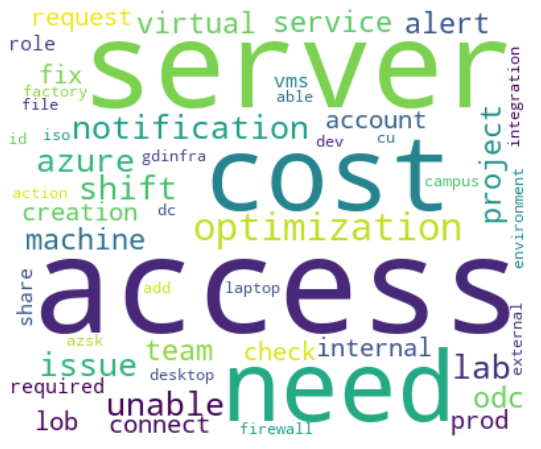

In [525]:
#Generate word cloud based on Count 
wc = WordCloud(width=400, height=330, max_words=50, background_color='white').generate_from_frequencies(data3[:].sum())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

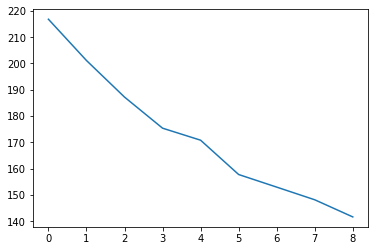

In [526]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, random_state=10,max_iter=300)
    model_clus.fit(data3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [533]:
n_clusters = 4
clf = KMeans(n_clusters=n_clusters, max_iter=400, init='k-means++', n_init=10, random_state=100)
labels_subset = clf.fit_predict(data3)

In [534]:
labels_subset

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1,
       1, 1])

In [535]:
np.unique(labels_subset, return_counts=True)

(array([0, 1, 2, 3]), array([ 7, 67, 14,  2], dtype=int64))

In [536]:
cluster_Sub=pd.DataFrame(labels_subset)

In [537]:
file=pd.concat([data,cluster_Sub],axis=1)

In [539]:
file.to_csv('C:\\Users\\Shrutee\\Desktop\\DataScience\\Clustering\\Results\\BOW\\Cluster5th_Subset.csv',index=0)

## TF-IDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tcv = TfidfVectorizer(min_df=2)

In [314]:
df4 = tcv.fit_transform(df1['Name'])
df4

<257x189 sparse matrix of type '<class 'numpy.float64'>'
	with 1832 stored elements in Compressed Sparse Row format>

In [315]:
df4=pd.DataFrame(tcv.fit_transform(df1['Name']).toarray(), columns=tcv.get_feature_names())

In [316]:
df4

,00,00am,00pm,02,02sep2020,03,03sep2020,04sep2020,05sep2020,06,06sep2020,07,07sep2020,08092020,08sep2020,09092020,09102020,09sep2020,10,10092020,11,11092020,11sep2020,12,12092020,12sep2020,13sep2020,14092020,14sep2020,15092020,16092020,16sep2020,17092020,17sep2020,18sep2020,2020,20am,30,30288,30am,30pm,40,45,able,access,account,accounts,action,add,afternoon,alert,alerts,all,am,and,app,are,asa,august,automation,azsk,azure,be,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cus,data,dcs,desktop,dev,devops,discussion,dl,enterprise_modernization_factory,environment,es,existing,expressroute,external,factory,factoryazuresub,file,firewall,firewalls,fix,for,from,gdinfra,health,id,in,install,int,integration,internal,ip,is,iso,issue,issues,lab,labs,laptop,lob,machine,microsoft,migration,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,notifications,odc,of,on,onprem,optimization,p2s,please,pm,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,rights,role,roles,run,server,servers,service,services,setting,setup,sg,share,shared,shift,shifts,shutdown,si,sonar,space,sskc2,subscription,subscriptions,team,the,ticket,time,to,two,unable,unused,up,virtual,vm,vms,vnet,vpn,windows,with,wsus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.750735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [317]:
df4.columns

Index(['00', '00am', '00pm', '02', '02sep2020', '03', '03sep2020', '04sep2020',
       '05sep2020', '06',
       ...
       'unused', 'up', 'virtual', 'vm', 'vms', 'vnet', 'vpn', 'windows',
       'with', 'wsus'],
      dtype='object', length=189)

In [318]:
df4.drop(['00', '00am', '00pm', '02', '02sep2020', '03', '03sep2020', '04sep2020',
       '05sep2020', '06',],axis=1,inplace=True)

In [166]:
df4.head()

,06sep2020,07,07sep2020,08092020,08sep2020,09092020,09102020,09sep2020,10,10092020,11,11092020,11sep2020,12,12092020,12sep2020,13sep2020,14092020,14sep2020,15092020,16092020,16sep2020,17092020,17sep2020,18sep2020,2020,20am,30,30288,30am,30pm,40,45,able,access,account,action,add,afternoon,alert,all,am,app,asa,august,automation,azsk,azure,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cu,data,dc,desktop,dev,devops,discussion,dl,enterprise,environment,existing,expressroute,external,factory,factoryazuresub,file,firewall,fix,gdinfra,health,id,install,int,integration,internal,ip,iso,issue,lab,laptop,lob,machine,microsoft,migration,modernization,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,odc,offshore,onprem,optimization,p2s,permission,please,pm,port,principal,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,right,role,run,server,service,setting,setup,sg,share,shared,shift,shutdown,si,sonar,space,sskc2,subscription,team,ticket,time,two,unable,unused,virtual,vm,vms,vnet,vpn,window,wsus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.531478,0.0,0.000000,0.503446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.362278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378631,0.0,0.0,0.0,0.0,0.0,0.0,0.399713,0.0,0.362278,0.378631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.598193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566642,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [319]:
df4.columns

Index(['06sep2020', '07', '07sep2020', '08092020', '08sep2020', '09092020',
       '09102020', '09sep2020', '10', '10092020',
       ...
       'unused', 'up', 'virtual', 'vm', 'vms', 'vnet', 'vpn', 'windows',
       'with', 'wsus'],
      dtype='object', length=179)

In [320]:
df4.drop(['06sep2020', '07', '07sep2020', '08092020', '08sep2020', '09092020',
       '09102020', '09sep2020', '10', '10092020'],axis=1,inplace= True)

In [321]:
df4.columns

Index(['11', '11092020', '11sep2020', '12', '12092020', '12sep2020',
       '13sep2020', '14092020', '14sep2020', '15092020',
       ...
       'unused', 'up', 'virtual', 'vm', 'vms', 'vnet', 'vpn', 'windows',
       'with', 'wsus'],
      dtype='object', length=169)

In [322]:
df4.drop(['11', '11092020', '11sep2020', '12', '12092020', '12sep2020',
       '13sep2020', '14092020', '14sep2020', '15092020'],axis=1,inplace= True)

In [323]:
df4.columns

Index(['16092020', '16sep2020', '17092020', '17sep2020', '18sep2020', '2020',
       '20am', '30', '30288', '30am',
       ...
       'unused', 'up', 'virtual', 'vm', 'vms', 'vnet', 'vpn', 'windows',
       'with', 'wsus'],
      dtype='object', length=159)

In [324]:
df4.drop(['16092020', '16sep2020', '17092020', '17sep2020', '18sep2020', '2020',
       '20am', '30', '30288', '30am'],axis=1,inplace= True)

In [325]:
df4.columns

Index(['30pm', '40', '45', 'able', 'access', 'account', 'accounts', 'action',
       'add', 'afternoon',
       ...
       'unused', 'up', 'virtual', 'vm', 'vms', 'vnet', 'vpn', 'windows',
       'with', 'wsus'],
      dtype='object', length=149)

In [326]:
df4.drop(['30pm', '40', '45'],axis=1,inplace=True)

In [327]:
df4.head()

,able,access,account,accounts,action,add,afternoon,alert,alerts,all,am,and,app,are,asa,august,automation,azsk,azure,be,caddev,campus,ccba,change,check,connect,consumption,contributor,cost,create,creation,cus,data,dcs,desktop,dev,devops,discussion,dl,enterprise_modernization_factory,environment,es,existing,expressroute,external,factory,factoryazuresub,file,firewall,firewalls,fix,for,from,gdinfra,health,id,in,install,int,integration,internal,ip,is,iso,issue,issues,lab,labs,laptop,lob,machine,microsoft,migration,monitoring,month,morning,movement,multiple,need,network,new,night,noon,not,notification,notifications,odc,of,on,onprem,optimization,p2s,please,pm,prod,project,provide,re,reduce,remove,request,required,resize,resource,review,revoke,rg,rights,role,roles,run,server,servers,service,services,setting,setup,sg,share,shared,shift,shifts,shutdown,si,sonar,space,sskc2,subscription,subscriptions,team,the,ticket,time,to,two,unable,unused,up,virtual,vm,vms,vnet,vpn,windows,with,wsus
0,0.0,0.750735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.660604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.460047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.460047,0.0,0.296460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507585,0.0,0.0,0.000000,0.0,0.480813,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348829,0.0,0.224789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384874,0.0,0.0,0.364574,0.0,0.364574,0.0,0.193786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348829,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494381,0.295406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0

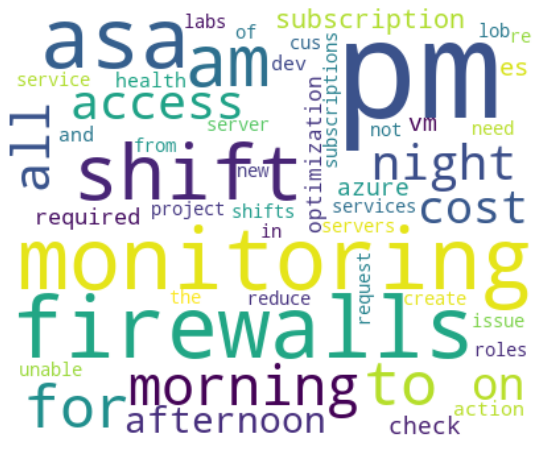

In [328]:
#Generate word cloud based on Count 
wc = WordCloud(width=400, height=330, max_words=50, background_color='white').generate_from_frequencies(df4[:].sum())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [329]:
df4.drop(['shift','night','afternoon','noon','morning','am','pm','all'],axis=1,inplace=True)

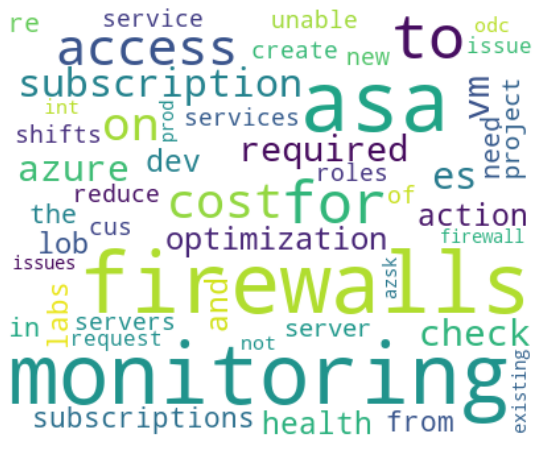

In [330]:
#Generate word cloud based on Count 
wc = WordCloud(width=400, height=330, max_words=50, background_color='white').generate_from_frequencies(df4[:].sum())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

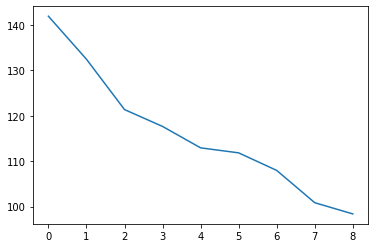

In [331]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, random_state=10,max_iter=300)
    model_clus.fit(df4)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [332]:
n_clusters = 7
clf = KMeans(n_clusters=n_clusters, max_iter=500, init='k-means++', n_init=10)
labels_tf = clf.fit_predict(df4)

In [333]:
labels_tf

array([0, 0, 0, 0, 0, 6, 0, 5, 0, 6, 6, 5, 2, 2, 2, 6, 2, 6, 2, 5, 0, 0,
       5, 0, 6, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 0, 6, 2, 2, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 1, 1, 0, 2, 1, 1,
       0, 6, 0, 1, 0, 0, 1, 6, 6, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 6, 5, 0, 0, 2, 0, 6, 6, 0, 5, 6, 0])

In [334]:
np.unique(labels_tf, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([189,  15,  14,   2,   6,   6,  25], dtype=int64))

In [335]:
cluster_tf=pd.DataFrame(labels_tf)

In [336]:
cluster_tf=pd.concat([df,cluster_tf],axis=1)

In [337]:
cluster_tf.to_csv('C:\\Users\\Shrutee\\Desktop\\DataScience\\Clustering\\Results\\TF-IDF\\cluster_tf7_new.csv',index=0)